# PROJET ML — CLASSIFICATION DE VIDÉOS YOUTUBE *TRENDING*

**Dataset Kaggle**: https://www.kaggle.com/datasets/datasnaek/youtube-new

**Objectif**: Développer un classificateur pour prédire si une vidéo YouTube deviendra *trending*.

> Ce notebook est conçu pour être complété. Chaque section contient des consignes détaillées et des zones de code à compléter.


## 1. Importation des librairies

**Consigne 1.1 — Importez toutes les librairies nécessaires**
- `pandas`, `numpy` pour la manipulation de données  
- `matplotlib.pyplot`, `seaborn` pour la visualisation  
- `sklearn` pour le machine learning  
- `warnings` pour supprimer les avertissements

In [ ]:
# VOTRE CODE ICI - Section 1.1
#import important libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# Suppression des warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Chargement et exploration des données

**Consigne 2.1 — Chargement des données**
- Chargez le fichier `USvideos.csv` avec pandas  
- Affichez les 5 premières lignes  
- Affichez les informations générales (`info()`, `shape`, `describe()`)

*Aide* :
- Utilisez `pd.read_csv()` avec `encoding='utf-8'`
- `.info()` donne les types de colonnes et valeurs non-nulles
- `.describe()` donne les statistiques descriptives

In [2]:
# VOTRE CODE ICI - Section 2.1
import pandas as pd
df = pd.read_csv('data/USvideos.csv', encoding='utf-8')
print("Premières lignes:")
display(df.head(5))
print("\nInformations générales:")
display(df.info())
print("Shape:", df.shape)
display(df.describe(include='all').transpose())

Premières lignes:


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...



Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949

None

Shape: (40949, 16)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
video_id,40949,6351,j4KvrAUjn6c,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trending_date,40949,205,17.14.11,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,40949,6455,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_title,40949,2207,ESPN,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_id,40949.0,NaN,NaN,NaN,19.972429,7.568327,1.0,17.0,24.0,25.0,43.0
publish_time,40949,6269,2018-05-18T14:00:04.000Z,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tags,40949,6055,[none],1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,40949.0,NaN,NaN,NaN,2360784.638257,7394113.759704,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,NaN,NaN,NaN,74266.702435,228885.338209,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,NaN,NaN,NaN,3711.400889,29029.705945,0.0,202.0,631.0,1938.0,1674420.0


**Consigne 2.2 — Analyse des valeurs manquantes**  
- Comptez les valeurs manquantes par colonne  
- Identifiez les colonnes avec le plus de valeurs manquantes  
- Affichez le pourcentage de valeurs manquantes

In [ ]:
# VOTRE CODE ICI - Section 2.2
missing = df.isna().sum()
missing_val = missing[missing > 0]
#print(missing_val)
# pourcentage of missing values 
pct_missing = (missing / len(df)) * 100
#print(pct_missing)
print("Valeurs manquantes (nombre):")
display(missing_val)
print("\nValeurs manquantes (pourcentage):")
display(pct_missing)

Valeurs manquantes (nombre):


description    570
dtype: int64


Valeurs manquantes (pourcentage):


video_id                  0.000000
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391975
dtype: float64

**Consigne 2.3 — Exploration des catégories**  
- Chargez le fichier JSON des catégories (`US_category_id.json`)  
- Fusionnez avec le DataFrame principal  
- Affichez la distribution des catégories

*Aide* : La structure JSON est du type:  
`{"items": [{"id": "1", "snippet": {"title": "Film & Animation"}}, ...]}`

In [4]:
# VOTRE CODE ICI - Section 2.3
import pandas as pd
import json

categories_raw = pd.read_json("data/US_category_id.json")
display(categories_raw.head(5))

items = categories_raw['items'].tolist()
display(items[:1])

category_dict = {int(item['id']): item['snippet']['title'] for item in items}

cat_df = pd.DataFrame(list(category_dict.items()), columns=['category_id', 'category_title'])
display(cat_df.head(5))

df_merged = df.merge(cat_df, how='left', left_on='category_id', right_on='category_id')

print("Distribution des catégories:")
display(df_merged['category_title'].value_counts().to_frame('count'))

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


[{'kind': 'youtube#videoCategory',
  'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
  'id': '1',
  'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
   'title': 'Film & Animation',
   'assignable': True}}]

,category_id,category_title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


Distribution des catégories:


,count
category_title,
Entertainment,9964
Music,6472
Howto & Style,4146
Comedy,3457
People & Blogs,3210
News & Politics,2487
Science & Technology,2401
Film & Animation,2345
Sports,2174


## 3. Nettoyage des données

**Consigne 3.1 — Nettoyage des données**
- Supprimez les doublons basés sur `video_id`  
- Gérez les valeurs manquantes dans `description` (remplacez par string vide)  
- Convertissez `publish_time` en datetime  
- Supprimez les lignes avec des valeurs aberrantes (ex: `views` négatives)

In [5]:
# VOTRE CODE ICI - Section 3.1
df_clean = df.drop_duplicates(subset='video_id').copy()
df_clean['description'] = df_clean['description'].fillna("")

import pandas as pd
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')

df_clean = df_clean[(df_clean['views'] >= 0) & (df_clean['likes'] >= 0) & (df_clean['dislikes'] >= 0) & (df_clean['comment_count'] >= 0)]
df_clean = df_clean.dropna(subset=['publish_time'])

In [6]:
df_clean.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## data visualization   / 

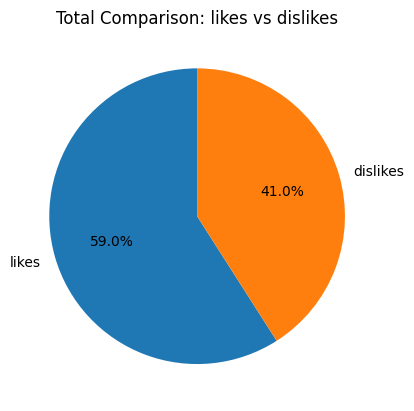

In [7]:
# comparison likes vs dislikes 
combined = [df_clean["likes"].sum(), df["dislikes"].sum()]

plt.pie(combined, labels=["likes", "dislikes"], autopct="%1.1f%%", startangle=90)
plt.title("Total Comparison: likes vs dislikes")
plt.show()

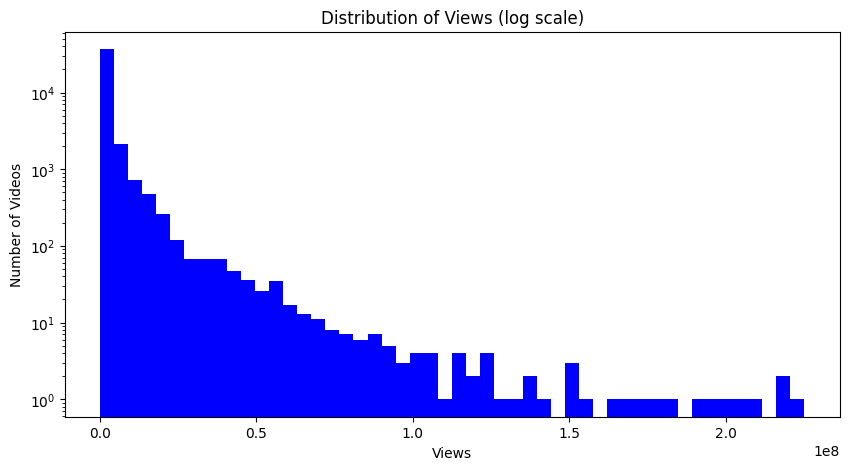

In [8]:
# Distribution of View

plt.figure(figsize=(10,5))
plt.hist(df["views"], bins=50, color="blue", log=True)
plt.xlabel("Views")
plt.ylabel("Number of Videos")
plt.title("Distribution of Views (log scale)")
plt.show()


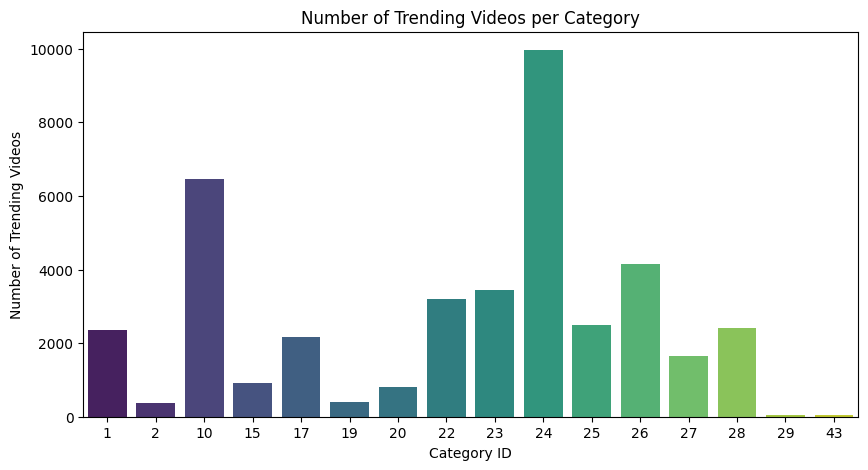

In [9]:
# Number of Trending Videos per Category
category_counts = df["category_id"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xlabel("Category ID")
plt.ylabel("Number of Trending Videos")
plt.title("Number of Trending Videos per Category")
plt.show()

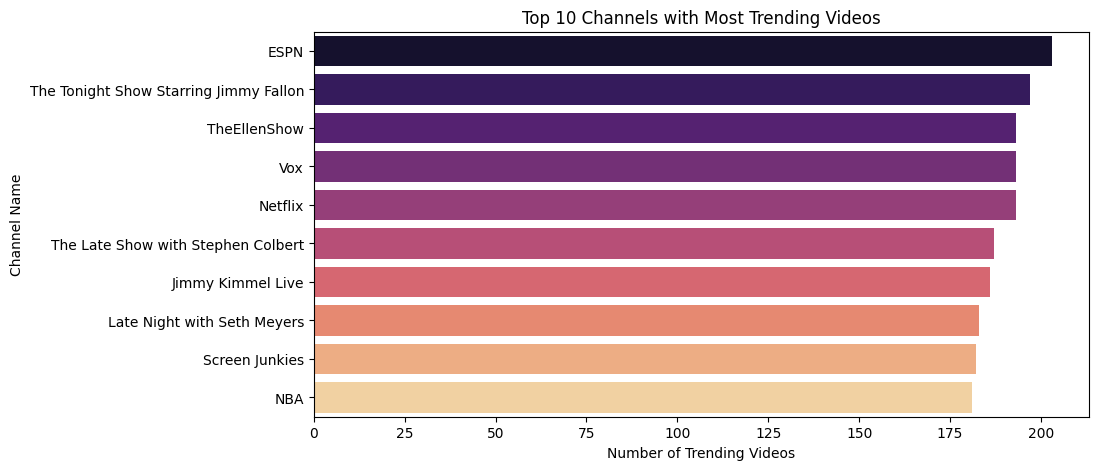

In [10]:
# Top 10 Channels with Most Trending Videos
top_channels = df["channel_title"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_channels.values, y=top_channels.index, palette="magma")
plt.xlabel("Number of Trending Videos")
plt.ylabel("Channel Name")
plt.title("Top 10 Channels with Most Trending Videos")
plt.show()


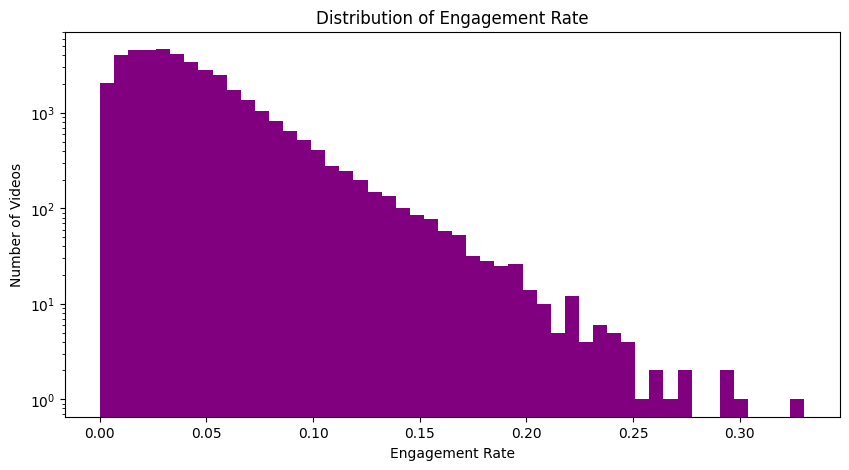

In [11]:
# Distribution of Engagement Rate
engagement_rate = (df["likes"] + df["dislikes"] + df["comment_count"]) / df["views"]

plt.figure(figsize=(10,5))
plt.hist(engagement_rate, bins=50, color="purple", log=True)
plt.xlabel("Engagement Rate")
plt.ylabel("Number of Videos")
plt.title("Distribution of Engagement Rate")
plt.show()


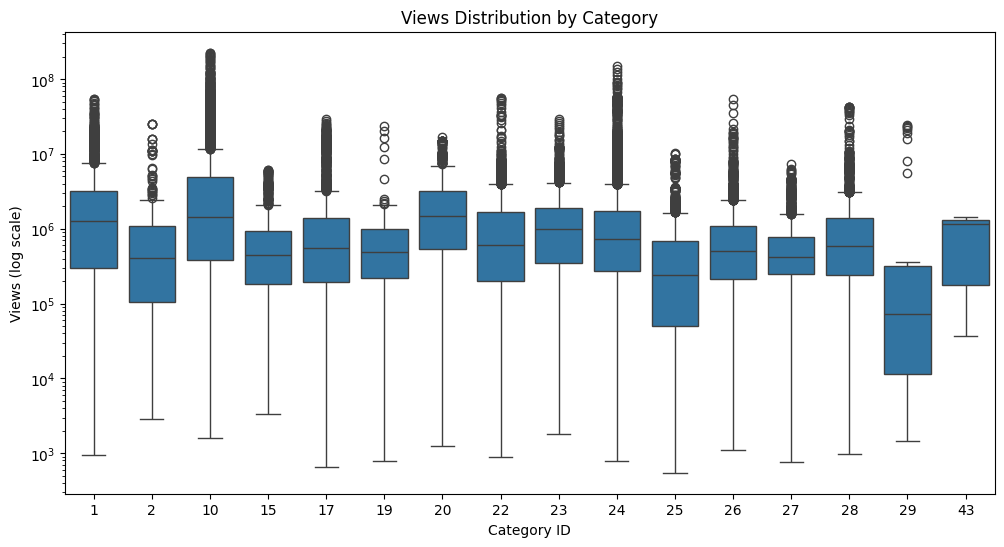

In [12]:
# views distribution by category
plt.figure(figsize=(12,6))
sns.boxplot(x="category_id", y="views", data=df)
plt.yscale("log")
plt.xlabel("Category ID")
plt.ylabel("Views (log scale)")
plt.title("Views Distribution by Category")
plt.show()


## 4. Feature Engineering

**Consigne 4.1 — Variables d'engagement**
** définition : https://support.google.com/youtube/answer/2991785?hl=fr**

In [13]:
# VOTRE CODE ICI - Section 4.1
import numpy as np
eps = 1e-9
denom = df_clean['likes'] + df_clean['dislikes']
df_clean['like_ratio'] = np.where(denom > 0, df_clean['likes'] / denom, 0)
df_clean['engagement_rate'] = np.where(df_clean['views'] > 0,
                                        (df_clean['likes'] + df_clean['dislikes'] + df_clean['comment_count']) / (df_clean['views'] + eps),
                                        0)
df_clean['comments_per_view'] = np.where(df_clean['views'] > 0, df_clean['comment_count'] / (df_clean['views'] + eps), 0)

**Consigne 4.2 — Variables temporelles**

In [14]:
# VOTRE CODE ICI - Section 4.2
df_clean['publish_hour'] = df_clean['publish_time'].dt.hour
df_clean['publish_day_of_week'] = df_clean['publish_time'].dt.day_of_week

df_clean['publish_month'] = df_clean['publish_time'].dt.month

In [15]:
df_clean['publish_hour']


0        17
1         7
2        19
3        11
4        18
         ..
40760    18
40761    15
40762     5
40764    16
40766     9
Name: publish_hour, Length: 6351, dtype: int32

In [16]:
df_clean['publish_day_of_week']


0        0
1        0
2        6
3        0
4        6
        ..
40760    1
40761    2
40762    2
40764    1
40766    2
Name: publish_day_of_week, Length: 6351, dtype: int32

In [17]:
df_clean['publish_month']

0        11
1        11
2        11
3        11
4        11
         ..
40760     6
40761     6
40762     6
40764     6
40766     6
Name: publish_month, Length: 6351, dtype: int32

**Consigne 4.3 — Variables textuelles (titre)**

In [18]:
# VOTRE CODE ICI - Section 4.3
df_clean['title_length'] = df_clean['title'].str.len()
df_clean['title_word_count'] = df_clean['title'].str.split().str.len()
df_clean['has_caps'] = df_clean['title'].str.contains(r"[A-Z]")
df_clean['has_numbers'] =  df_clean['title'].str.contains(r"[0-9]")

In [19]:
df_clean['title_length']

0        34
1        62
2        53
3        32
4        24
         ..
40760    29
40761    94
40762    49
40764    65
40766    64
Name: title_length, Length: 6351, dtype: int64

In [20]:
df_clean['title_word_count']

0         7
1        10
2        10
3         5
4         5
         ..
40760     6
40761    16
40762    10
40764    12
40766    10
Name: title_word_count, Length: 6351, dtype: int64

In [21]:
df_clean['has_caps']

0        True
1        True
2        True
3        True
4        True
         ... 
40760    True
40761    True
40762    True
40764    True
40766    True
Name: has_caps, Length: 6351, dtype: bool

In [22]:
df_clean['has_numbers']

0        False
1        False
2        False
3        False
4        False
         ...  
40760    False
40761    False
40762    False
40764    False
40766     True
Name: has_numbers, Length: 6351, dtype: bool

## 5. Création de la variable cible

**Consigne 5.1 — Définition de `is_trending`**  
- Une vidéo est *trending* si elle a plus de vues que le 80e percentile de sa catégorie

In [23]:
# VOTRE CODE ICI - Section 5.1
df_clean['is_trending'] = (df_clean.groupby('category_id')['views']
                                .transform(lambda x: x > x.quantile(0.8))).astype(int)
print("Distribution de la variable cible:")
display(df_clean['is_trending'].value_counts().to_frame('count'))

Distribution de la variable cible:


,count
is_trending,
0,5078
1,1273


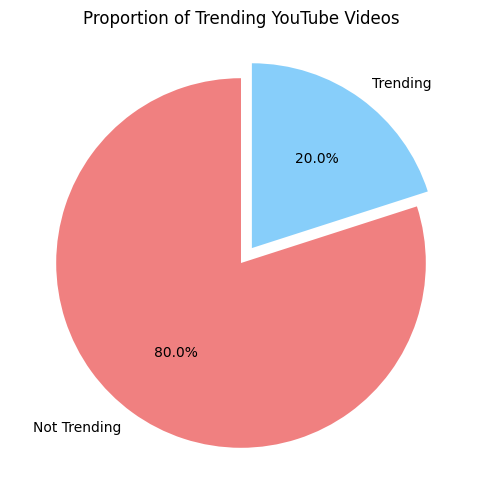

In [24]:
import matplotlib.pyplot as plt

# Count trending vs non-trending videos
trending_counts = df_clean['is_trending'].value_counts()

# Labels
labels = ['Not Trending', 'Trending']

# Colors
colors = ['lightcoral', 'lightskyblue']

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(trending_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Proportion of Trending YouTube Videos')
plt.show()


## 6. Préparation des données pour l'entraînement

**Consignes 6.1 & 6.2 — Sélection des features & split train/test**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# # VOTRE CODE ICI - Section 6.1 et 6.2
features = ['views', 'likes', 'dislikes', 'comment_count',
              'like_ratio', 'engagement_rate', 'title_length', 'publish_hour', 'category_id', 'publish_day_of_week']
X = df_clean[features].copy()
y = df_clean['is_trending'].copy()



X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Taille train: {X_train.shape}")
print(f"Taille test: {X_test.shape}")

Taille train: (5080, 10)
Taille test: (1271, 10)


**Consigne 6.3 — Normalisation des données (StandardScaler)**

In [27]:
# VOTRE CODE ICI - Section 6.3
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['views', 'likes', 'dislikes', 'comment_count', 'like_ratio', 'engagement_rate', 'title_length', 'publish_hour', 'publish_day_of_week']

#fit uniquement sur train 
scaled_data = scaler.fit_transform(X_train[num_cols])
scaled_test = scaler.transform(X_test[num_cols])

scaled_df = pd.DataFrame(scaled_data)
scaled_df_test = pd.DataFrame(scaled_test)

display(scaled_df)


,0,1,2,3,4,5,6,7,8
0,-0.190321,0.196941,-0.078638,-0.010656,0.496158,2.613256,1.061072,0.536255,0.204106
1,0.371766,-0.125667,0.136475,-0.073151,-0.400986,-0.761750,-0.904847,-0.851586,1.830973
2,-0.384427,-0.329485,-0.120316,-0.225418,-1.612548,-0.957531,2.422093,0.227846,1.830973
3,-0.099298,-0.178653,-0.090380,-0.143154,0.392545,-0.436374,0.758623,0.073642,1.288684
4,-0.357218,-0.294799,-0.118434,-0.211807,0.501317,0.382160,-0.955255,-1.931018,-0.880472
...,...,...,...,...,...,...,...,...,...
5075,-0.250234,-0.293818,-0.013477,-0.208782,-1.399728,-0.725275,-0.148724,0.073642,0.204106
5076,0.471890,0.170667,-0.038215,0.011166,0.423927,-0.361949,-0.098316,0.536255,-0.880472
5077,-0.074746,-0.154211,-0.075411,-0.148501,0.345217,-0.390979,-0.804030,0.382051,0.204106
5078,0.362407,-0.197675,-0.050315,-0.159898,0.124374,-0.948695,2.371685,0.382051,0.746395


## 7. Modèle 1 — Random Forest

**Consigne 7.1 — Entraînement**

In [64]:
# VOTRE CODE ICI - Section 7.1
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10)

model = rf_model.fit(scaled_df, y_train)
rf_prediction = rf_model.predict(scaled_df_test)



**Consigne 7.2 — Évaluation**

In [65]:
# VOTRE CODE ICI - Section 7.2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Random Forest - Résultats:")
print(f"Accuracy: {accuracy_score(y_test, rf_prediction):.4f}")
print(f"Precision: {precision_score(y_test, rf_prediction):.4f}")
print(f"Recall: {recall_score(y_test, rf_prediction):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_prediction):.4f}")

Random Forest - Résultats:
Accuracy: 0.9378
Precision: 0.9170
Recall: 0.7778
F1-Score: 0.8417


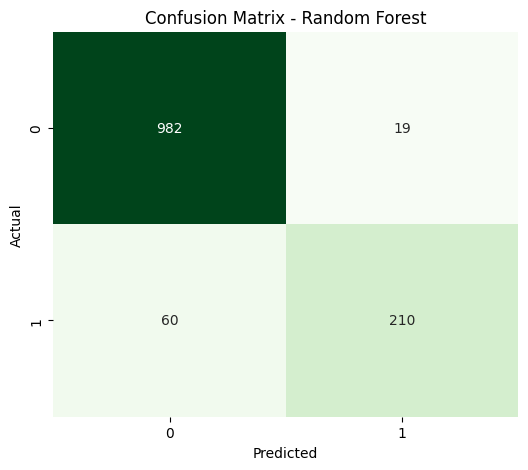

In [66]:
cm = confusion_matrix(y_test, rf_prediction)

#  Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [67]:
# Importance des variables
import pandas as pd
feature_importance = pd.DataFrame({
    'feature': num_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 10 variables importantes:")
display(feature_importance.head(10))


Top 10 variables importantes:


,feature,importance
0,views,0.547528
2,dislikes,0.130956
3,comment_count,0.107867
1,likes,0.099356
5,engagement_rate,0.053338
4,like_ratio,0.021596
6,title_length,0.015759
7,publish_hour,0.015520
8,publish_day_of_week,0.008080


## 8. Modèle 2 — Support Vector Machine (SVM)

**Consigne 8.1 — Entraînement (utiliser données normalisées)**

In [68]:
# VOTRE CODE ICI - Section 8.1
from sklearn.svm import SVC
# create the svc model with rbf kernel
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=1)
# training 
svc_model.fit(scaled_df, y_train)

# predict
svc_predictions = model.predict(scaled_df_test)

**Consigne 8.2 — Évaluation**

In [69]:
# VOTRE CODE ICI - Section 8.2
print("SVM - Résultats:")
print(f"Accuracy: {accuracy_score(y_test, svc_predictions):.4f}")
print(f"Precision: {precision_score(y_test, svc_predictions):.4f}")
print(f"Recall: {recall_score(y_test, svc_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, svc_predictions):.4f}")


SVM - Résultats:
Accuracy: 0.9378
Precision: 0.9170
Recall: 0.7778
F1-Score: 0.8417


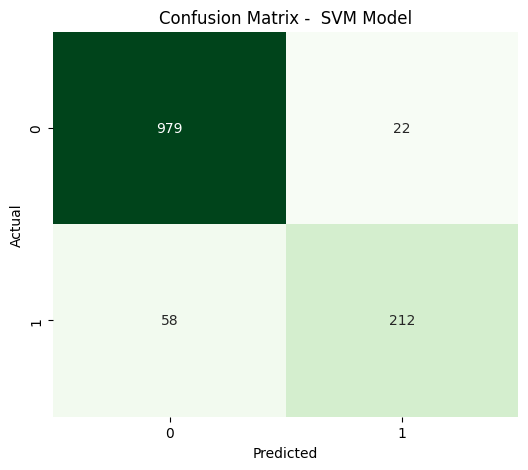

In [34]:
# confusion matrix SVC
cm2 = confusion_matrix(y_test, svc_predictions)

#  Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix -  SVM Model")
plt.show()

## 9. Modèle 3 — Gradient Boosting (XGBoost)

**Consigne 9.1 — Entraînement**

In [70]:
# VOTRE CODE ICI - Section 9.1
from xgboost import XGBClassifier

# Define the XGBoost classifier with tuned parameters
xgb_model = XGBClassifier(
    n_estimators=200,          # Number of boosting trees (higher for smaller learning_rate)
    learning_rate=0.05,        # Step size shrinkage to prevent overfitting
    max_depth=5,               # Maximum depth of a tree (controls model complexity)
    min_child_weight=1,        # Minimum sum of instance weight needed in a child node
    gamma=0,                   # Minimum loss reduction required for a split
    subsample=0.8,             # Fraction of training samples used per tree
    colsample_bytree=0.8,      # Fraction of features used per tree
    reg_alpha=0.1,             # L1 regularization term (forces sparsity)
    reg_lambda=1.0,            # L2 regularization term (reduces variance)
    random_state=42,           # Seed for reproducibility
    n_jobs=-1,                 # Use all CPU cores
    eval_metric='logloss',     # Evaluation metric (logarithmic loss for binary classification)
    use_label_encoder=False    # Avoids warning in new versions of XGBoost
)

# Train the model 
xgb_model.fit(
    scaled_df, y_train,
    verbose=True               
)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(scaled_df_test)


**Consigne 9.2 — Évaluation**

In [71]:
# VOTRE CODE ICI - Section 9.2
print("XGBoost - Résultats:")
print(f"Accuracy: {accuracy_score(y_test, xgb_predictions):.4f}")
print(f"Precision: {precision_score(y_test, xgb_predictions):.4f}")
print(f"Recall: {recall_score(y_test, xgb_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, xgb_predictions):.4f}")

XGBoost - Résultats:
Accuracy: 0.9410
Precision: 0.9046
Recall: 0.8074
F1-Score: 0.8532


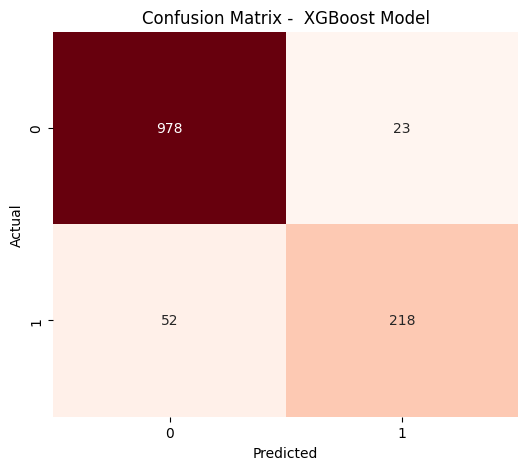

In [37]:
# confusion matrix XGBoost
cm2 = confusion_matrix(y_test, xgb_predictions)

#  Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix -  XGBoost Model")
plt.show()

## 10. Modèle 4 — Réseau de Neurones (MLPClassifier)

**Consigne 10.1 — Entraînement (données normalisées)**

In [72]:
# VOTRE CODE ICI - Section 10.1
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(scaled_df, y_train)
nn_predictions = nn_model.predict(scaled_df_test)

**Consigne 10.2 — Évaluation**

In [74]:
# VOTRE CODE ICI - Section 10.2
print("Réseau de Neurones - Résultats:")
print(f"Accuracy : {accuracy_score(y_test, nn_predictions):4f}")
print(f"Precision: {precision_score(y_test, nn_predictions):.4f}")
print(f"Recall: {recall_score(y_test, nn_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test, nn_predictions):.4f}")
# # Nombre d'itérations
print("number of iterations :", nn_model.n_iter_)

Réseau de Neurones - Résultats:
Accuracy : 0.929976
Precision: 0.8494
Recall: 0.8148
F1-Score: 0.8318
number of iterations : 233


## 11. Comparaison des modèles

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.937057,0.905983,0.785185,0.841270
1,SVM,0.937057,0.905983,0.785185,0.841270
2,XGBoost,0.940991,0.904564,0.807407,0.853229
3,Neural Network,0.929976,0.849421,0.814815,0.831758


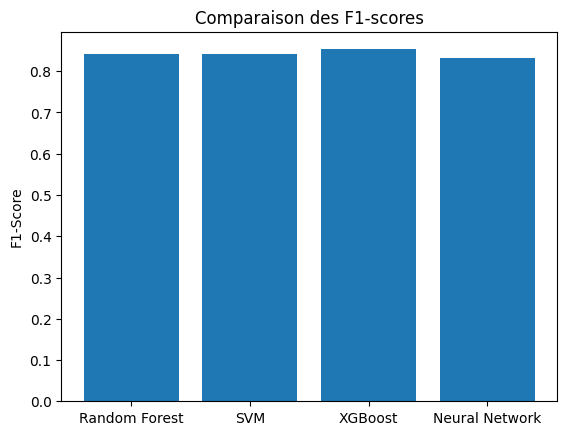

In [40]:
# VOTRE CODE ICI - Section 11.1
import pandas as pd
results = []
# Remplir en fonction des métriques calculées plus haut

# random forest classifier 
results.append({'Model': 'Random Forest', 'Accuracy': accuracy_score(y_test, rf_prediction), 'Precision': precision_score(y_test, rf_prediction),
                'Recall': recall_score(y_test, rf_prediction), 'F1-Score': f1_score(y_test, rf_prediction)})

# support victor machine 
results.append({'Model': 'SVM', 'Accuracy': accuracy_score(y_test, svc_predictions), 'Precision': precision_score(y_test, svc_predictions),
                'Recall': recall_score(y_test, svc_predictions), 'F1-Score': f1_score(y_test, svc_predictions)})

# XGBoost
results.append({'Model': 'XGBoost', 'Accuracy': accuracy_score(y_test, xgb_predictions), 'Precision': precision_score(y_test, xgb_predictions),
                'Recall': recall_score(y_test, xgb_predictions), 'F1-Score': f1_score(y_test, xgb_predictions)})

# Neural network
results.append({'Model': 'Neural Network', 'Accuracy': accuracy_score(y_test, nn_predictions), 'Precision': precision_score(y_test, nn_predictions),
                'Recall': recall_score(y_test, nn_predictions), 'F1-Score': f1_score(y_test, nn_predictions)})
results_df = pd.DataFrame(results)
display(results_df)
# Graphique comparatif des F1-scores (optionnel)
import matplotlib.pyplot as plt
plt.figure()
plt.bar(results_df['Model'], results_df['F1-Score'])
plt.title('Comparaison des F1-scores')
plt.ylabel('F1-Score')
plt.show()

## 12. Validation croisée

In [54]:
# VOTRE CODE ICI - Section 12.1
from sklearn.model_selection import cross_val_score
#Exemple avec Random Forest (remplacez par votre meilleur modèle)
scores = cross_val_score(rf_model, scaled_df, y_train, cv=10, scoring='f1', n_jobs=-1)
print(f"Validation croisée - F1-Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

Validation croisée - F1-Score: 0.8574 (+/- 0.0672)


## 13. Optimisation des hyperparamètres (Grid Search)

In [55]:
# VOTRE CODE ICI - Section 13.1
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=10,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(scaled_df, y_train)
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score CV:", grid_search.best_score_)
best_rf = grid_search.best_estimator_
best_rf_pred = best_rf.predict(scaled_test)

Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Meilleur score CV: 0.863117864715892


## 14. Analyse des erreurs

[[977  24]
 [ 57 213]]


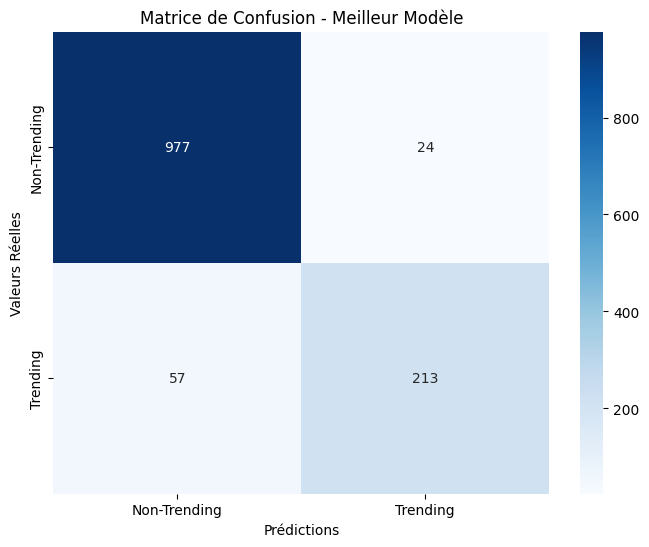

In [62]:
# VOTRE CODE ICI - Section 14.1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Exemple: matrice de confusion pour le meilleur modèle (remplacez best_rf_pred)
cm3 = confusion_matrix(y_test, best_rf_pred)
print(cm3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Trending', 'Trending'],
            yticklabels=['Non-Trending', 'Trending'])
plt.title('Matrice de Confusion - Meilleur Modèle')
plt.ylabel('Valeurs Réelles')
plt.xlabel('Prédictions')
plt.show()

In [77]:
# VOTRE CODE ICI - Section 14.2
# # Identifier des exemples mal classifiés (adapter selon le modèle choisi)
errors_mask = (y_test != best_rf_pred)
error_indices = X_test[errors_mask].index
print("Exemples de vidéos mal classifiées:")
for idx in list(error_indices)[:5]:
    real_label = y_test.loc[idx]
    predicted_label = best_rf_pred[list(error_indices).index(idx)]  # à adapter si nécessaire
    print(f"Index {idx}: Réel={real_label}, Prédit={predicted_label}")

Exemples de vidéos mal classifiées:
Index 257: Réel=0, Prédit=0
Index 27578: Réel=1, Prédit=0
Index 14033: Réel=0, Prédit=0
Index 31781: Réel=0, Prédit=0
Index 22565: Réel=0, Prédit=0


## 15. Sauvegarde & conclusions

In [78]:
# VOTRE CODE ICI - Section 15.1
import joblib
# Remplacez 'best_rf' / 'scaler' par vos objets
joblib.dump(best_rf, 'best_youtube_classifier.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
print("Modèle et scaler sauvegardés avec succès!")

Modèle et scaler sauvegardés avec succès!


### Conclusions à rédiger

1. **Meilleur modèle**  
   - Modèle: *[À compléter]*  
   - Performances: *[À compléter]*  
   - Raisons: *[À compléter]*

2. **Variables les plus importantes**  
   - *[À compléter]*

3. **Limitations**  
   - *[À compléter]*

4. **Améliorations suggérées**  
   - *[À compléter]*

5. **Apprentissages**  
   - *[À compléter]*

---
## Guide de testing pour les étudiants

**Comment tester vos implémentations :**
1. **Vérifications de base** : `.shape`, `.info()`, `.head()`  
2. **Validation des features** : pas de NaN, ratios entre 0 et 1, plages temporelles correctes  
3. **Validation des modèles** : prédictions binaires {0,1}, longueurs cohérentes, comparaisons rigoureuses  
4. **Tests de cohérence** : scores réalistes, F1 entre précision et rappel, impact de la normalisation  
5. **Debugging** : augmenter `max_iter` si nécessaire, vérifier entrées/sorties et dimensions